# Proyecto Regresion - **Ajedrez** - Hugo Peralta Muñoz

Este dataset ha sido descargado en la plataforma de <a href="https://www.kaggle.com/datasets/datasnaek/chess">Kaggle</a>, sin embargo, los datos se han tratado y han sido sacados de la plataforma <a href="https://lichess.org/">lichess</a>, un servidor de ajedrez de código abierto, libre de anuncios.

En principio tendremos varios campos en el dataset que cargaremos, mas adelante comprobaremos qué campos son relevantes y cuáles no.

## Obtención de los datos

Primero de todo importaremos las librerías que más usaremos a lo largo del proyecto, tanto para hacer cálculos como para visualización de los datos.

In [ ]:
# Operaciones y funciones matemáticas
import numpy as np

# Visualización de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento del modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Rendimiento del modelo
from sklearn.metrics import classification_report

Los datos en este proyecto están contenidos en un CSV, por lo que lo importaremos como un DataFrame de `pandas`.

In [ ]:
chess_df = pd.read_csv("/content/games.csv")

## Descripción de las columnas

In [ ]:
chess_df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

De todos los datos que tenemos del dataset, muchos de ellos son autodescriptivos, muestran tal cual lo hacen en inglés.

Tendremos en nuestro dataset:

- `id`: identificador de la partida en la base de datos de *lichess.org*.
- `rated`: booleano si la partida es competitiva o no (con rankings de puntos).           
- `created_at`: momento de creación de la partida.     
- `last_move_at`: momento donde se registra la última jugada de la partida.
- `turns`: turnos que ha durado la partida.          
- `victory_status`: cómo ha terminado la partida.  
- `winner`: si el ganador son las piezas blancas o negras.           
- `white_id`: id del jugador de piezas blancas.      
- `white_rating`: ranking del jugador de piezas blancas.    
- `black_id`: id del jugador de piezas negras.        
- `black_rating`: ranking del jugador de piezas negras.    
- `moves`: movimientos de la partida en <a href="https://en.wikipedia.org/wiki/Chess_notation">notación de ajedrez estándar</a>.           


Las columnas que puede que sean mas complicadas de entender son:
- `increment_code`: duración que tendrán los turnos, vienen en un formato parecido a `15+02` siendo $15$ la cantidad de tiempo en minutos que tendrá cada jugador y `+2` hace referencia al incremento de segundos que tendrá realizar un movimiento.
- `opening_eco`: código estandarizado de cualquier apertura posible en el ajedrez, hacer referencia a este <a href="https://www.365chess.com/eco.php">link</a>.    
- `opening_name`: nombre de la jugada de apertura que se ha realizado.   
- `opening_ply`: número de movimientos que se han realizado para lograr la apertura.

## Exploración de los datos

In [ ]:
chess_df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [ ]:
chess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


Ninguno de los atributos presenta valores nulos, aunque muchos de nuestros campos son del typo `object` lo que significa que son todos del tipo cadena de caracteres.

Uno de los campos que son más complicados de leer puede ser el formato de la fecha, un ejemplo del primer elemento es `1.504210e+12` en los atributos `created_at` y `last_move_at`. El formato es *Unix Timestamp*, representa los segundos que han transcurridos desde el 1 de enero de 1970 a las 00:00:00.

Algo que podremos hacer es formatear este campo para representar estos segundos de una forma más reconocible a la hora de visualizarlo:

In [ ]:
chess_df['created_at'] = pd.to_datetime(chess_df['created_at'], unit='ms')
chess_df['last_move_at'] = pd.to_datetime(chess_df['last_move_at'], unit='ms')

chess_df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,2017-08-31 20:06:40,2017-08-31 20:06:40,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,2017-08-30 21:53:20,2017-08-30 21:53:20,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,2017-08-30 21:53:20,2017-08-30 21:53:20,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,2017-08-30 16:20:00,2017-08-30 16:20:00,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,2017-08-29 18:06:40,2017-08-29 18:06:40,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


Ahora podemos ver las fechas en un formato más reconocible.

Gracias a este formateo podremos ver que alguno de estos dos atributos está recogido de forma **errónea**, ya que muestra la misma hora de creación de la partida y del último movimiento siendo por ejemplo, el primer valor del dataset, una partida que ha terminado como `outoftime`, es decir, que ha transcurrido tiempo en la partida.

Esta tabla la eliminaremos a la hora de preparar los datos para el modelo, ya que son datos que no nos interesa y que además no han sido recogidos correctamente.

Ahora, algo interesante que podemos visualizar es el porcentaje de victoria que tienen las piezas blancas y negras.

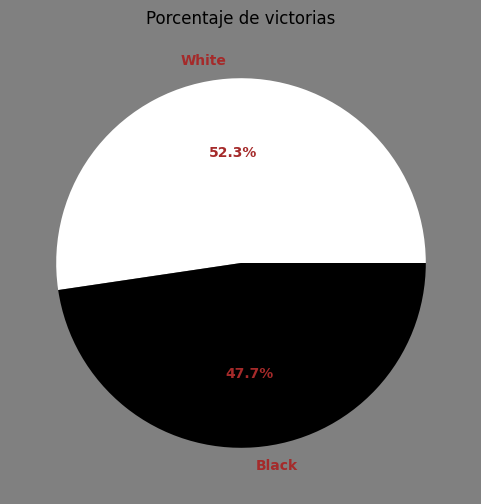

In [ ]:
white_wins = len(chess_df[chess_df['winner'] == 'white'])
black_wins = len(chess_df[chess_df['winner'] == 'black'])
total_games = len(chess_df)

white_win_percentage = (white_wins / total_games) * 100
black_win_percentage = (black_wins / total_games) * 100

plt.figure(figsize=(6, 6), facecolor="grey")
plt.pie([white_win_percentage, black_win_percentage],
        labels=['White', 'Black'],
        colors=['white', 'black'],
        autopct='%1.1f%%', # Muestra los porcentajes en el gráfico con un decimal
        textprops={'color': 'brown', "weight":"bold"})  # Ajusta el color de los textos)
plt.title('Porcentaje de victorias')
plt.show()

Tambien podemos ver qué cantidad de partidas son competitivas o no.

<ipython-input-8-42d9026bfe33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rated', data=chess_df, palette="viridis")


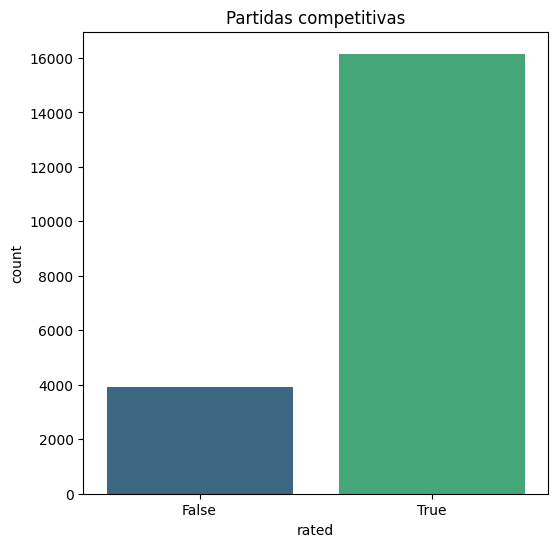

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='rated', data=chess_df, palette="viridis")
plt.title('Partidas competitivas')
plt.show()

Vemos que 4000 de las partidas que tenemos no son competitivas, es decir, no cuentan en el ranking.

Podríamos observar también la media de turnos que se realizan en las partidas almacenadas.

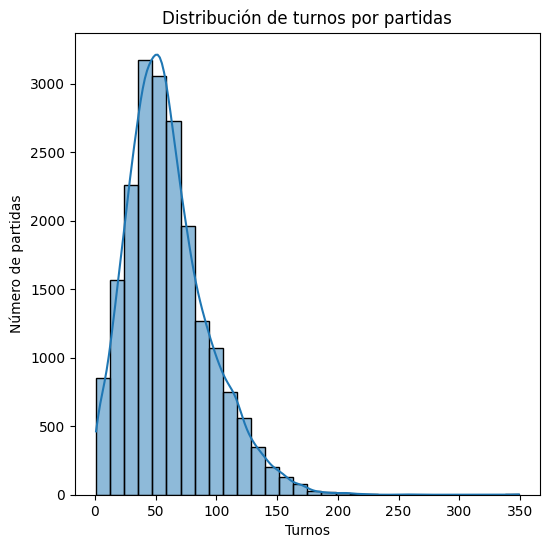

In [ ]:
plt.figure(figsize=(6, 6))
sns.histplot(chess_df['turns'],
             bins=30,  # Es la cantidad de barras, pondremos un limite para poder observar com mas claridad los resultados
             kde=True) # Dibuja una curva a lo largo del histograma visualizando la distribucion de los datos

plt.title('Distribución de turnos por partidas')
plt.xlabel('Turnos')
plt.ylabel('Número de partidas')
plt.show()

Otro de los campos que nos interesa es el de `victory_status`, para observar de qué tipo de formas puede acabar una partida y con qué frecuencia se producen.

<ipython-input-10-9b2d2e57e166>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='victory_status', data=chess_df, palette="viridis")


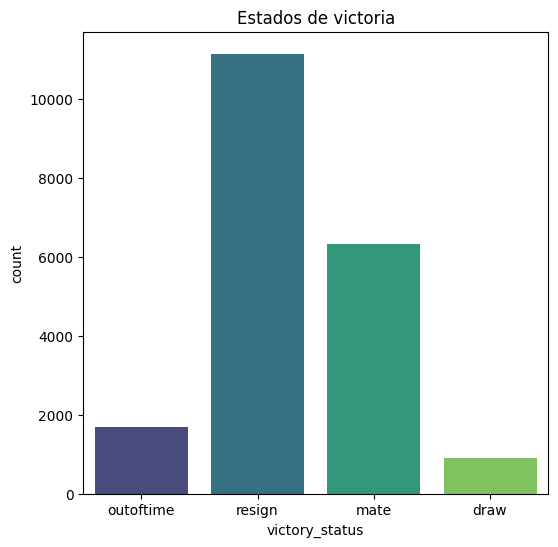

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='victory_status', data=chess_df, palette="viridis")
plt.title('Estados de victoria')
plt.show()

Haciendo un `describe()` y mostrando los datos en un histograma:

In [ ]:
chess_df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,20058,20058,20058.000000,20058.000000,20058.000000,20058.000000
mean,2017-01-05 11:47:32.629092352,2017-01-05 12:02:02.336142080,60.465999,1596.631868,1588.831987,4.816981
min,2013-08-17 20:33:53.173000,2013-08-17 20:37:43.841000,1.000000,784.000000,789.000000,1.000000
25%,2016-10-27 05:51:40,2016-10-27 05:51:40,37.000000,1398.000000,1391.000000,3.000000
50%,2017-05-28 22:20:00,2017-05-28 22:20:00,55.000000,1567.000000,1562.000000,4.000000
75%,2017-08-19 19:13:20,2017-08-19 19:13:20,79.000000,1793.000000,1784.000000,6.000000
max,2017-09-04 02:45:43.790000,2017-09-04 02:57:07.262000,349.000000,2700.000000,2723.000000,28.000000
std,NaN,NaN,33.570585,291.253376,291.036126,2.797152


array([[<Axes: title={'center': 'created_at'}>,
        <Axes: title={'center': 'last_move_at'}>],
       [<Axes: title={'center': 'turns'}>,
        <Axes: title={'center': 'white_rating'}>],
       [<Axes: title={'center': 'black_rating'}>,
        <Axes: title={'center': 'opening_ply'}>]], dtype=object)

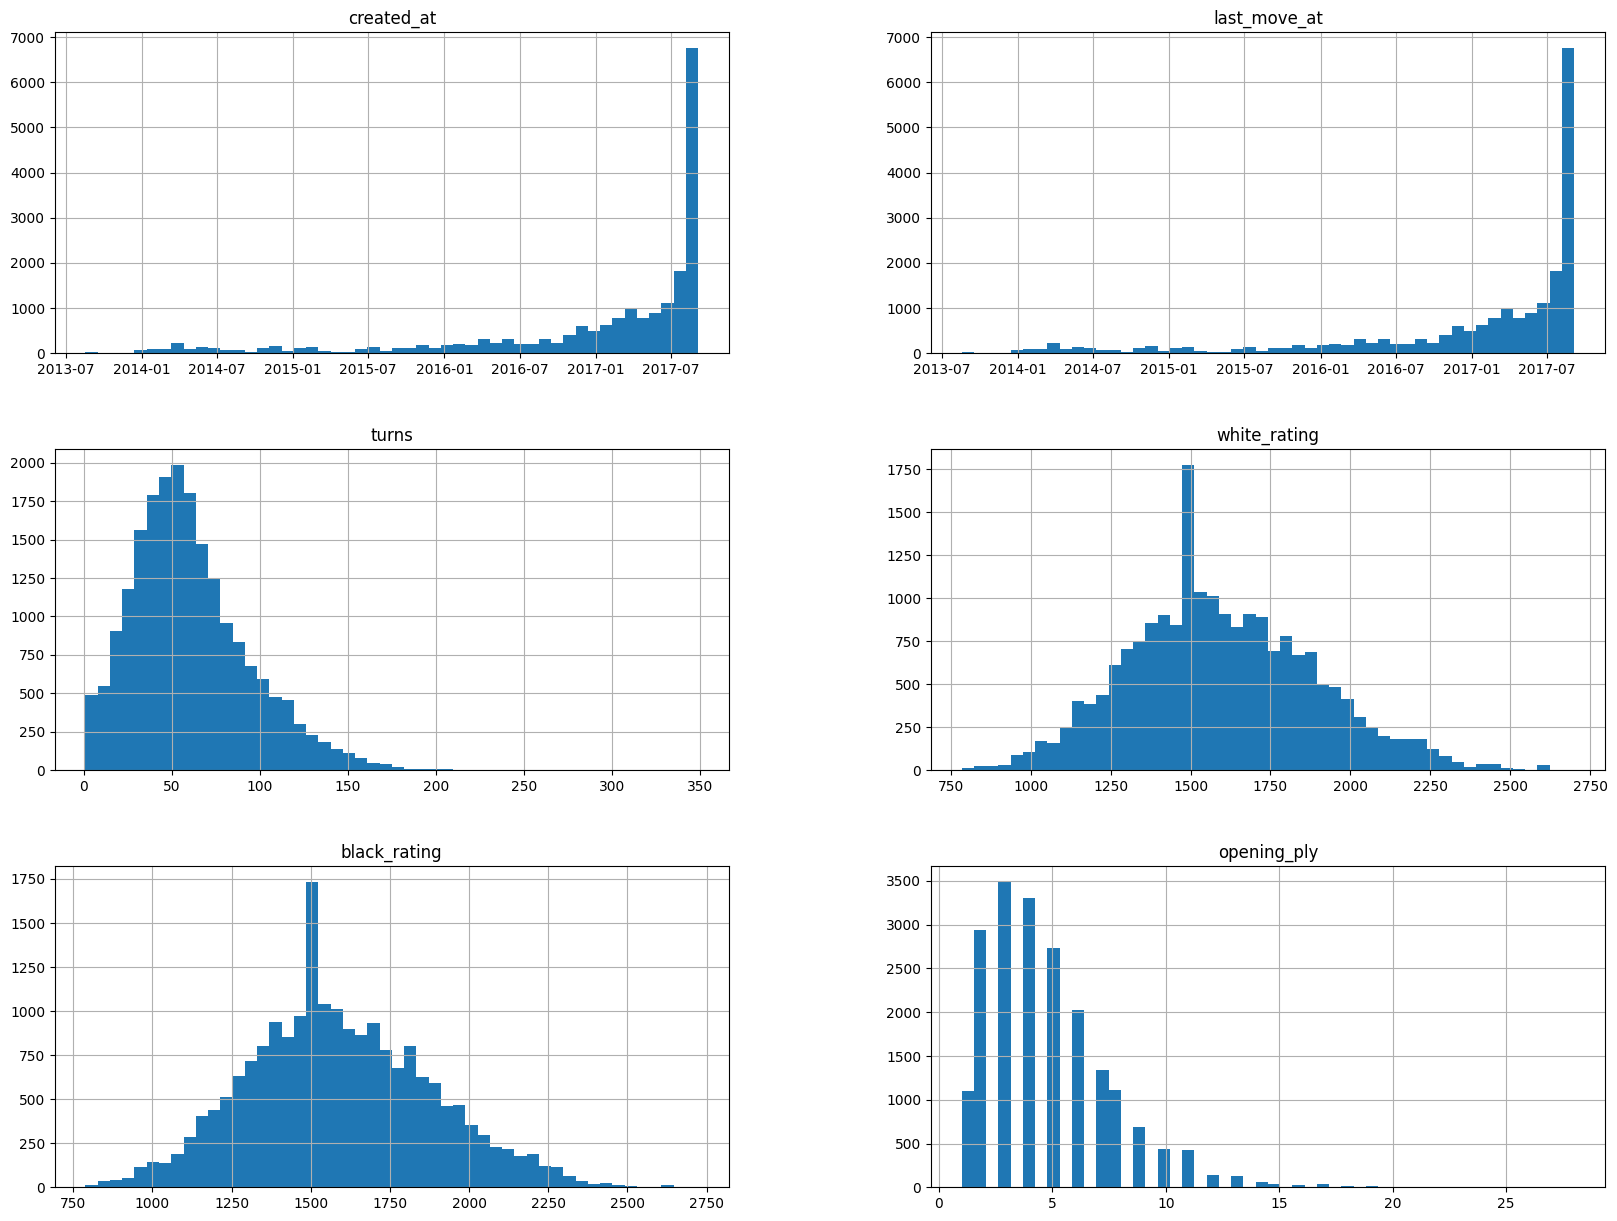

In [ ]:
chess_df.hist(bins=50, figsize=(20, 15))

Lo poco que podemos sacar en claro de los histogramas es que el límite donde se recogieron estos datos del dataset fue en Julio de 2017.

Además, la media del rating de los jugadores ronda los $1500$ puntos del ranking.

### Otros datos de interés

Aquí podremos ver otros datos, bastante interesantes con los que se pueden sacar en claro varios percentiles estadísticos.

Primero de todo podremos ver las $5$ salidas más usadas por piezas blancas y piezas negras.



<ipython-input-13-60982a18ad49>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings_white.values, y=top_openings_white.index, ax=axes[0], palette="Blues_d")
<ipython-input-13-60982a18ad49>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_openings_black.values, y=top_openings_black.index, ax=axes[1], palette="Reds_d")


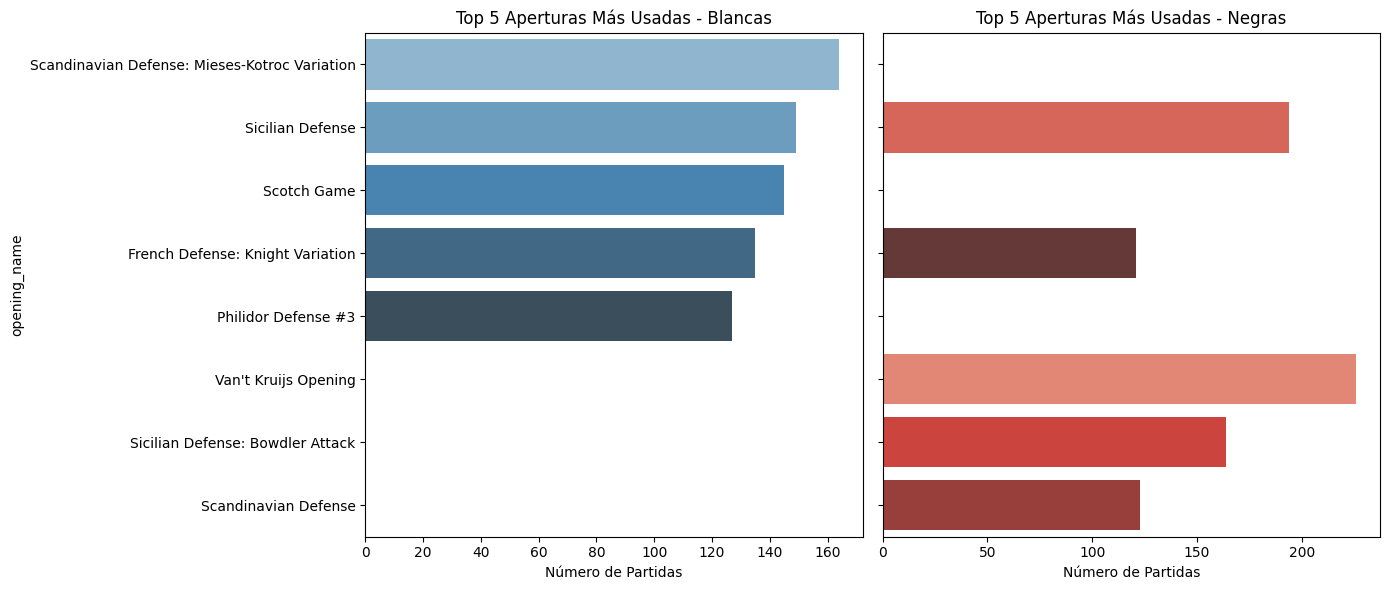

In [ ]:
# Contar las aperturas más utilizadas para los ganadores "white" y "black"
top_openings_white = chess_df[chess_df['winner'] == 'white']['opening_name'].value_counts().head(5)
top_openings_black = chess_df[chess_df['winner'] == 'black']['opening_name'].value_counts().head(5)

# Crear la figura y los ejes para las gráficas de barras
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True) # Ambos subplots comparten la misma escala del axis `y`

# Configuración de la gráfica para blancas
sns.barplot(x=top_openings_white.values, y=top_openings_white.index, ax=axes[0], palette="Blues_d")
axes[0].set_title("Top 5 Aperturas Más Usadas - Blancas")
axes[0].set_xlabel("Número de Partidas")

# Configuración de la gráfica para negras
sns.barplot(x=top_openings_black.values, y=top_openings_black.index, ax=axes[1], palette="Reds_d")
axes[1].set_title("Top 5 Aperturas Más Usadas - Negras")
axes[1].set_xlabel("Número de Partidas")

plt.tight_layout()
plt.show()

También podríamos ver el top 10 de jugadores según su ranking en el dataset.

<ipython-input-14-f0566bf6fa5c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_players.index, y=top_10_players.values, palette="viridis")


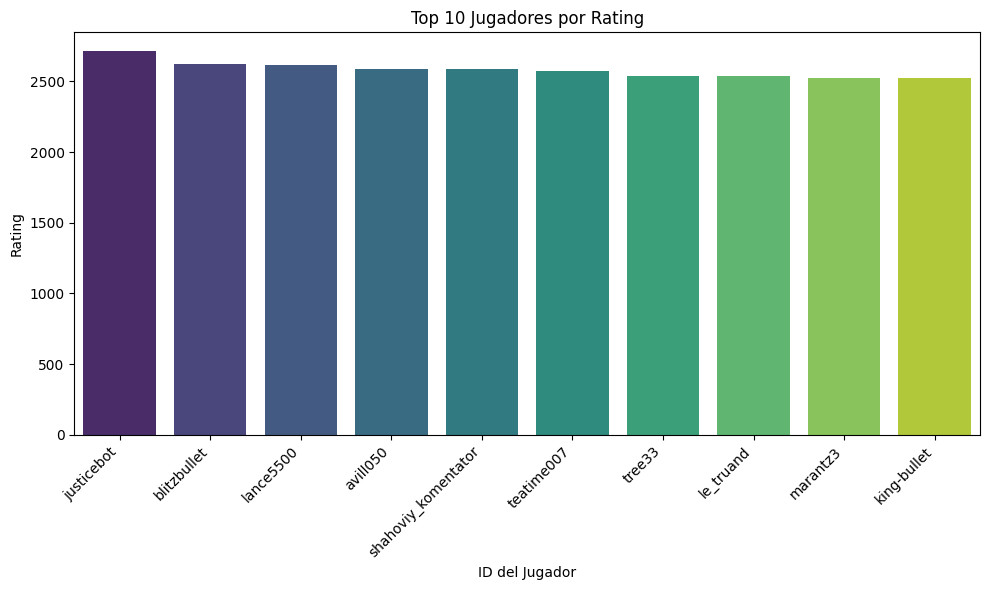

In [ ]:
all_players = pd.concat([chess_df[['white_id', 'white_rating']],
                         chess_df[['black_id', 'black_rating']].rename(columns={'black_id': 'white_id', 'black_rating': 'white_rating'})])

average_ratings = all_players.groupby('white_id')['white_rating'].mean().sort_values(ascending=False) # Convierte todos los jugadores a jugadores de piezas blancas y los ordena por su ranking

top_10_players = average_ratings.head(10)

# Crear un gráfico de barras para visualizar el top 10 de jugadores
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_players.index, y=top_10_players.values, palette="viridis")
plt.title("Top 10 Jugadores por Rating")
plt.xlabel("ID del Jugador")
plt.ylabel("Rating")
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
plt.tight_layout()
plt.show()

## Objetivo del proyecto

El objetivo de este proyecto es crear un modelo de inteligencia artificial que sea capaz de adivinar el ganador de una partida de ajedrez sin tener el resultado o, en este caso, teniendo de target o columna a predecir `winner`.

Es por esto, que el proyecto se trata de un modelo **supervisado** ya que contamos con el resultado que esperamos obtener y se trata de una **clasificación**, va a clasificar el ganador de las partidas entre piezas blancas o negras o, en su defecto, empate.

## Preparación de los datos

Primero de todo, como comentamos en el apartado de *Exploración de los datos*, eliminaremos las columnas de `created_at` y `last_move_at`, ya que no nos interesa para nuestro modelo y, además, los datos recogidos son **erróneos**.

Aparte de eliminar estas columnas, aprovecharemos para eliminar otras columnas que tampoco nos interesan como son `id`, `white_id`, `black_id` y `moves`.

Los campos de las id no nos aporta ninguna información de interés en nuestro caso y el campo de `moves` es importante que lo eliminemos, ya que describe la partida completa con la notación de ajedrez estándar, por lo que no nos interesa pasársela a nuestro modelo.

In [ ]:
columns_to_drop = ["id", "created_at", "last_move_at", "white_id", "black_id", "moves"]
chess_df = chess_df.drop(columns=columns_to_drop)

chess_df.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,False,13,outoftime,white,15+2,1500,1191,D10,Slav Defense: Exchange Variation,5
1,True,16,resign,black,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,95,mate,white,30+3,1523,1469,C41,Philidor Defense,5


Uno de los datos más importantes que deberíamos pasar a número sería la columna de `winner`, de forma que si es $0$ significa que ganan las piezas blancas y si es $1$ significa que ganan las piezas negras y si es $2$ significa que es un empate.

In [ ]:
chess_df["winner"].unique()

array(['white', 'black', 'draw'], dtype=object)

In [ ]:
chess_df["winner"] = chess_df["winner"].replace(["white", "black", "draw"], [0, 1, 2])

chess_df.head()

<ipython-input-17-e3a920fa8e80>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chess_df["winner"] = chess_df["winner"].replace(["white", "black", "draw"], [0, 1, 2])


,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,False,13,outoftime,0,15+2,1500,1191,D10,Slav Defense: Exchange Variation,5
1,True,16,resign,1,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,61,mate,0,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,61,mate,0,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,95,mate,0,30+3,1523,1469,C41,Philidor Defense,5


Viendo nuestra tabla, podemos observar que el atributo `rated` es un booleano que describe si una partida es competitiva o no, lo que podríamos hacer para facilitar este campo a nuestro modelo es pasar los booleanos a números enteros.

Los valores `False` los convertiremos a $0$ y los valores `True` los convertiremos a $1$.

In [ ]:
chess_df["rated"] = chess_df["rated"].replace([True, False], [1, 0])

chess_df.head()

<ipython-input-18-bc12f9d2259e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chess_df["rated"] = chess_df["rated"].replace([True, False], [1, 0])


,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,0,13,outoftime,0,15+2,1500,1191,D10,Slav Defense: Exchange Variation,5
1,1,16,resign,1,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,1,61,mate,0,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,1,61,mate,0,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,1,95,mate,0,30+3,1523,1469,C41,Philidor Defense,5


Otro de los valores que podríamos convertir a numérico sería la columna `victory_status`, representando con un número el tipo de victoria que podemos tener en nuestras partidas de ajedrez.

In [ ]:
chess_df["victory_status"].unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

Tenemos los campos `outoftime`, `resign`, `mate` y `draw`, los cuales reemplazaremos por una numeración sencilla desde 0 a 3 en este mismo orden que tenemos.

In [ ]:
chess_df["victory_status"] = chess_df["victory_status"].replace(["outoftime", "resign", "mate", "draw"], [0, 1, 2, 3])

chess_df.head()

<ipython-input-20-1aa372f30a7f>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  chess_df["victory_status"] = chess_df["victory_status"].replace(["outoftime", "resign", "mate", "draw"], [0, 1, 2, 3])


,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply
0,0,13,0,0,15+2,1500,1191,D10,Slav Defense: Exchange Variation,5
1,1,16,1,1,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,1,61,2,0,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,1,61,2,0,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,1,95,2,0,30+3,1523,1469,C41,Philidor Defense,5


Como comentamos anteriormente, la columna increment_code consta de dos partes numéricas y un símbolo de $+$, el primer número son los minutos iniciales y el segundo número son los segundos que se añaden por cada jugada. Este campo nos sugiere que dividamos el atributo en dos columnas, una con los minutos iniciales y otra con los segundos que se suman al tiempo total por cada jugada.

In [ ]:
chess_df[["initial_minutes", "additional_seconds"]] = chess_df["increment_code"].str.split("+", expand=True)

chess_df["initial_minutes"] = chess_df["initial_minutes"].astype(int)
chess_df["additional_seconds"] = chess_df["additional_seconds"].astype(int)

In [ ]:
chess_df.head()

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply,initial_minutes,additional_seconds
0,0,13,0,0,15+2,1500,1191,D10,Slav Defense: Exchange Variation,5,15,2
1,1,16,1,1,5+10,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,5,10
2,1,61,2,0,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3,5,10
3,1,61,2,0,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3,20,0
4,1,95,2,0,30+3,1523,1469,C41,Philidor Defense,5,30,3


Ya que tenemos los datos separados, podríamos eliminar la columna inicial de `increment_code` de nuestro dataframe.

In [ ]:
chess_df = chess_df.drop(columns=["increment_code"])

chess_df.head()

,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_name,opening_ply,initial_minutes,additional_seconds
0,0,13,0,0,1500,1191,D10,Slav Defense: Exchange Variation,5,15,2
1,1,16,1,1,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,5,10
2,1,61,2,0,1496,1500,C20,King's Pawn Game: Leonardis Variation,3,5,10
3,1,61,2,0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3,20,0
4,1,95,2,0,1523,1469,C41,Philidor Defense,5,30,3


Por último, un dato que sería interesante implementar en el dataframe podría ser la diferencia de rating entre ambos jugadores. De esta forma podremos ver la diferencia de nivel entre ambos jugadores y ver si las partidas están niveladas.

In [ ]:
chess_df["rating_difference"] = chess_df["white_rating"] - chess_df["black_rating"]

chess_df.head()

,rated,turns,victory_status,winner,white_rating,black_rating,opening_eco,opening_name,opening_ply,initial_minutes,additional_seconds,rating_difference
0,0,13,0,0,1500,1191,D10,Slav Defense: Exchange Variation,5,15,2,309
1,1,16,1,1,1322,1261,B00,Nimzowitsch Defense: Kennedy Variation,4,5,10,61
2,1,61,2,0,1496,1500,C20,King's Pawn Game: Leonardis Variation,3,5,10,-4
3,1,61,2,0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3,20,0,-15
4,1,95,2,0,1523,1469,C41,Philidor Defense,5,30,3,54


Podríamos representar ahora en una gráfica cuál es la diferencia media entre jugadores en una partida.

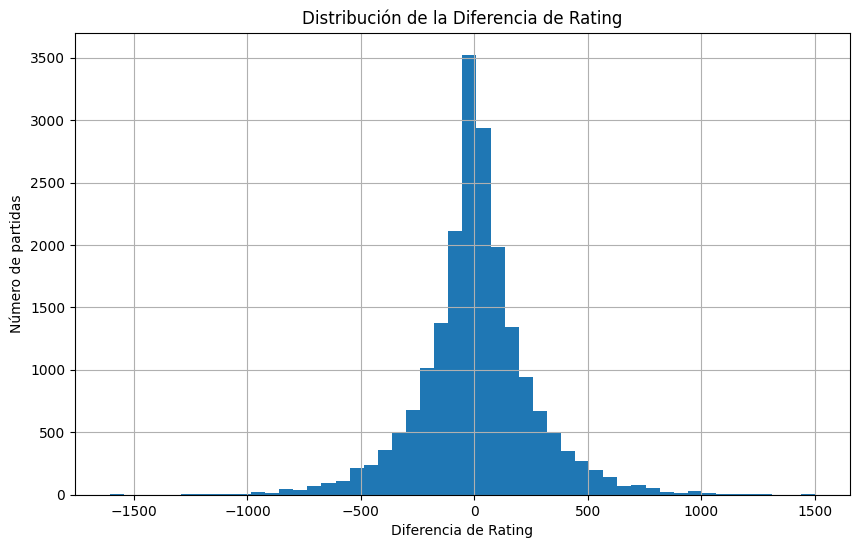

In [ ]:
chess_df["rating_difference"].hist(bins=50, figsize=(10, 6))
plt.title("Distribución de la Diferencia de Rating")
plt.xlabel("Diferencia de Rating")
plt.ylabel("Número de partidas")
plt.show()

Aquí podemos observar que, de media, el ranking o rating de los jugadores no varían más de 500 o -500:

$|white\_rating - black\_rating| <= 500$

### Correlaciones

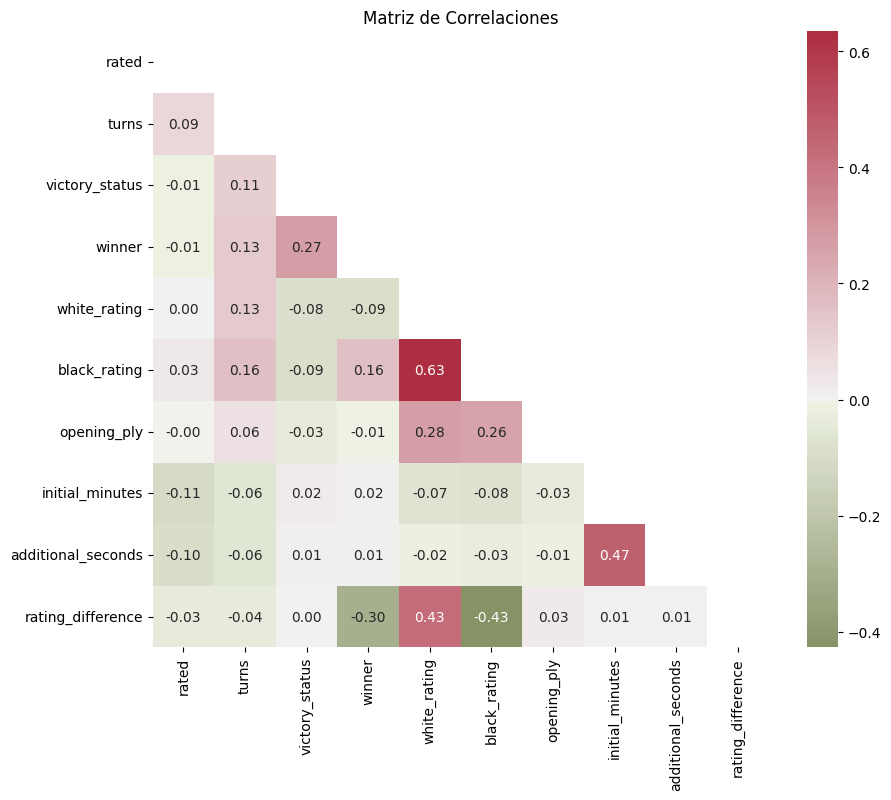

In [ ]:
# Matriz de correlaciones

corr_matrix = chess_df.drop(["opening_eco", "opening_name"], axis=1).corr()

triangular_mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

new_cmap = sns.diverging_palette(100, 7, s=75, l=40, n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=triangular_mask, center=0, cmap=new_cmap ,annot=True, fmt=".2f", square=True)

plt.title("Matriz de Correlaciones")
plt.show()

No hay datos demasiados relacionados como podemos comprobar en el mapa de calor de las correlaciones, por lo que en principio no deberíamos de tener que prescindir de ninguna columna

### Creación de los datos de entrenamiento y de prueba.

Vamos a separar los datos que tenemos en el dataset en dos partes:
- Datos de entrenamiento (training set): 80% de los datos totales.
- Datos de prueba (test set): 20% de los datos totales.

Antes de separar nuestros datos, tendremos que almacenar en las variables $X$ el vector de características y en $y$ la columna de los datos del target o más bien, los datos de la columna que estamos buscando predecir el resultado, en nuestro caso, la columna `winner`.

**Nota Importante**: Deberemos de eliminar las partidas que acaben en empate, esto es debido a que la columna de `victory_status` también almacena si la partida ha acabado en empate y el modelo sería capaz de predecir los empates con bastante certeza.

In [ ]:
chess_df_no_draws = chess_df[chess_df["winner"] != 2]

X = chess_df_no_draws.drop(["winner", "opening_eco", "opening_name"], axis=1)
y = chess_df_no_draws["winner"]

In [ ]:
X.head()

,rated,turns,victory_status,white_rating,black_rating,opening_ply,initial_minutes,additional_seconds,rating_difference
0,0,13,0,1500,1191,5,15,2,309
1,1,16,1,1322,1261,4,5,10,61
2,1,61,2,1496,1500,3,5,10,-4
3,1,61,2,1439,1454,3,20,0,-15
4,1,95,2,1523,1469,5,30,3,54


In [ ]:
y.head()

,winner
0,0
1,1
2,0
3,0
4,0


Ahora separaremos los datos en entrenamiento y test:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train

,rated,turns,victory_status,white_rating,black_rating,opening_ply,initial_minutes,additional_seconds,rating_difference
18321,1,39,1,1581,1493,3,10,0,88
16401,1,31,1,1446,1452,5,10,0,-6
5539,1,40,1,1786,1900,3,10,0,-114
13341,0,149,2,1402,1341,8,10,5,61
16057,0,118,1,2305,2085,8,20,5,220
...,...,...,...,...,...,...,...,...,...
4940,1,39,1,2076,1450,5,10,0,626
18620,1,38,2,1730,1473,8,15,5,257
18101,1,113,1,2100,2212,11,10,0,-112
13913,1,129,0,1284,1446,2,10,0,-162


In [ ]:
X_test

,rated,turns,victory_status,white_rating,black_rating,opening_ply,initial_minutes,additional_seconds,rating_difference
3034,1,9,1,1102,930,4,10,0,172
9056,1,84,1,1525,1628,5,10,0,-103
4539,1,37,2,1325,1262,3,10,0,63
7542,0,47,0,1598,1500,8,8,0,98
4214,1,21,1,1125,1153,2,10,5,-28
...,...,...,...,...,...,...,...,...,...
3652,1,69,1,1468,1358,4,15,0,110
10187,1,38,0,1263,1521,3,5,8,-258
7961,1,35,2,1511,1526,3,10,0,-15
17905,1,46,2,2052,2286,5,7,7,-234


In [ ]:
y_train

,winner
18321,0
16401,1
5539,1
13341,0
16057,1
...,...
4940,0
18620,1
18101,0
13913,0


In [ ]:
y_test

,winner
3034,0
9056,1
4539,0
7542,0
4214,0
...,...
3652,0
10187,1
7961,0
17905,1


Vemos que se ha dividido correctamente, los datos de entrenamiento cuentan con $15286$ filas y los datos de test cuentan con $3822$ entradas. Esto equivalen al $80$% y $20$% de los datos respectivamente.

## Entrenamiento del modelo

En nuestro caso intentaremos entrenar el modelo de clasificiación con los dos siguientes algoritmos: `Regresión Logística (Logistic Regression)` y `Árbol de decisión (Decision Tree Classifier)`

In [ ]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

y_pred_logistic = logistic_regression_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
decision_tree_model = DecisionTreeClassifier(max_depth=25,
                                             random_state=42,
                                             min_samples_split=15,
                                             min_samples_leaf=10,
                                             criterion="entropy",
                                             class_weight="balanced",
                                             )
decision_tree_model.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_model.predict(X_test)

## Comparación de rendimientos

Para comprobar el rendimiento de los modelos que tenemos usaremos una herramienta que incorpora `sklearn` la cual es `classiffication report`.

Esta clase muestra por pantalla el rendimiento de los modelos de inteligencia artificial por clasificación según varios parámetros:
- `precision`: Es la proporción de predicciones correctas de una clase específica sobre todas las predicciones hechas para esa clase.
  - Por ejemplo, para las piezas negras, si da un porcentaje del 70% significa que el 70% de las veces que predice que las piezas negras ganan, es correcto.
- `recall`: Mide la proporción de verdaderos positivos sobre todos los casos reales.
- `f1-score`: Es la medida entre la `precision` y el `recall`, proporcionando un balance entre ambos.
- `support`: Es la cantidad de casos reales en cada clase.
- `accuracy`: Es el porcentaje de predicciones correctas del modelo en general.
- `macro avg`: Calcula el promedio de cada métrica (`precision`, `recall` y `f1-score`) sin tener en cuenta el desequilibrio entre estas, es decir, la diferencia de sus valores.
- `weighted avg`: Calcula el promedio de cada métrica (`precision`, `recall` y `f1-score`) considerando el desequilibrio de cada una.


In [ ]:
print("Regresión Logística:")
print(classification_report(y_test, y_pred_logistic, digits=3))
print()
print("Árbol de decisión:")
print(classification_report(y_test, y_pred_decision_tree, digits=3))

Regresión Logística:
              precision    recall  f1-score   support

           0      0.668     0.727     0.696      2021
           1      0.660     0.594     0.625      1801

    accuracy                          0.664      3822
   macro avg      0.664     0.660     0.661      3822
weighted avg      0.664     0.664     0.663      3822


Árbol de decisión:
              precision    recall  f1-score   support

           0      0.723     0.686     0.704      2021
           1      0.667     0.706     0.686      1801

    accuracy                          0.695      3822
   macro avg      0.695     0.696     0.695      3822
weighted avg      0.697     0.695     0.695      3822



## Conclusiones

Para un dataset que al final tiene una longitud de menos de $20000$ entradas podemos ver que tiene un porcentaje de precisión de hasta el $70.9$% (En este runtime, al volver a ejecutar todo el código, este valor puede cambiar), lo cual no está nada mal, esto significa que el modelo predice correctamente el ganador de la partida en aproximadamente ese porcentaje de veces. Además, con estos datos podemos sacar en claro varios puntos.

Primero, el algoritmo de `Decision Tree Classifier` saca un mejor porcentaje de precisión de los resultados a diferencia de la `logistic regression`.

También, podemos observar que el modelo presenta una precisión y recall superior para las victorias de "white". Esto puede deberse a que en nuestro dataset tenemos más partidas que las ganan las piezas blancas o que tenemos más datos de este tipo de atributo en comparación a las piezas negras, que cuentan con bastantes menos partidas registradas. Esto podría significar que tenemos un pequeño sesgo en nuestros datos de entrenamiento.

Por último, algo que creo que cabe destacar es que la diferencia de `rating` de los jugadores es uno de los factores más importantes para predecir el resultado. Probablemente, si tratásemos con otros datos y otro tipo de modelo, como de aprendizaje automático, el modelo podría predecir con más exactitud si un jugador es capaz de ganar a otro según el momento de la partida en concreto en la que se encuentre.

